## Student Name: Vilohit Keshava Murthy Achar

## Student ID: 23077751

# Imports

You should not import any further functionality. If you feel this is required to complete the task, please discuss with your moderator.

In [1]:
pip install scikit-optimize

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# imported to keep track of compute time if you wish
import sys
np.set_printoptions(threshold=sys.maxsize)
import time

In [3]:
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.neural_network import MLPClassifier

# Provided code
The below code is not necessarily complete or applicable to all tasks. Read and understand the code so that you can use wisely and adapt as required.

In [4]:
def plot_margin(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

To compare the SVM with a NN:

In [5]:
def plot_decisions(X, y, model):
    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = model.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

This wrapper is required in below BayesSearchCV for a neural network to combine the two layer arguments (or more if you wish to experiment with more than two layers) into the single hidden_layer_sizes hyper-parameter.

In [7]:
class MLPWrapper(BaseEstimator, ClassifierMixin):

    def __init__(self, layer1=10, layer2=10, layer3=10,layer4=10, activation='relu'):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
        self.layer4 = layer4
        self.activation = activation


    def fit(self, X, y):
        model = MLPClassifier(
            hidden_layer_sizes=[self.layer1, self.layer2,self.layer3,self.layer4],
            activation = self.activation,
            max_iter = 1000,
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)

In [8]:
# Example use of BayesSearchCV to search a large search space whilst keeping compute requirements in check

optSVM1_lin = BayesSearchCV(
    svm.SVC(),
    {
      'C': Real(1e-3, 1e+3, prior='log-uniform'),
        'kernel': Categorical(['linear']),
    },
    n_iter=100,
)

In [9]:
# Example use of BayesSearchCV with the MLPWrapper to vary the layer sizes

optNN1 = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces={
        'layer1': Integer(1, 100),
        'layer2': Integer(1, 100)
    },
    n_iter=100,
)

# Solutions

## Task 1

In [10]:
data = np.loadtxt('dataset_1_train.csv', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

In [11]:
clf_hard = svm.SVC(kernel='linear', C=20)
clf_hard.fit(X, y)

SVC(C=20, kernel='linear')

In [12]:
clf_soft = svm.SVC(kernel='linear', C=0.4)
clf_soft.fit(X, y)

SVC(C=0.4, kernel='linear')

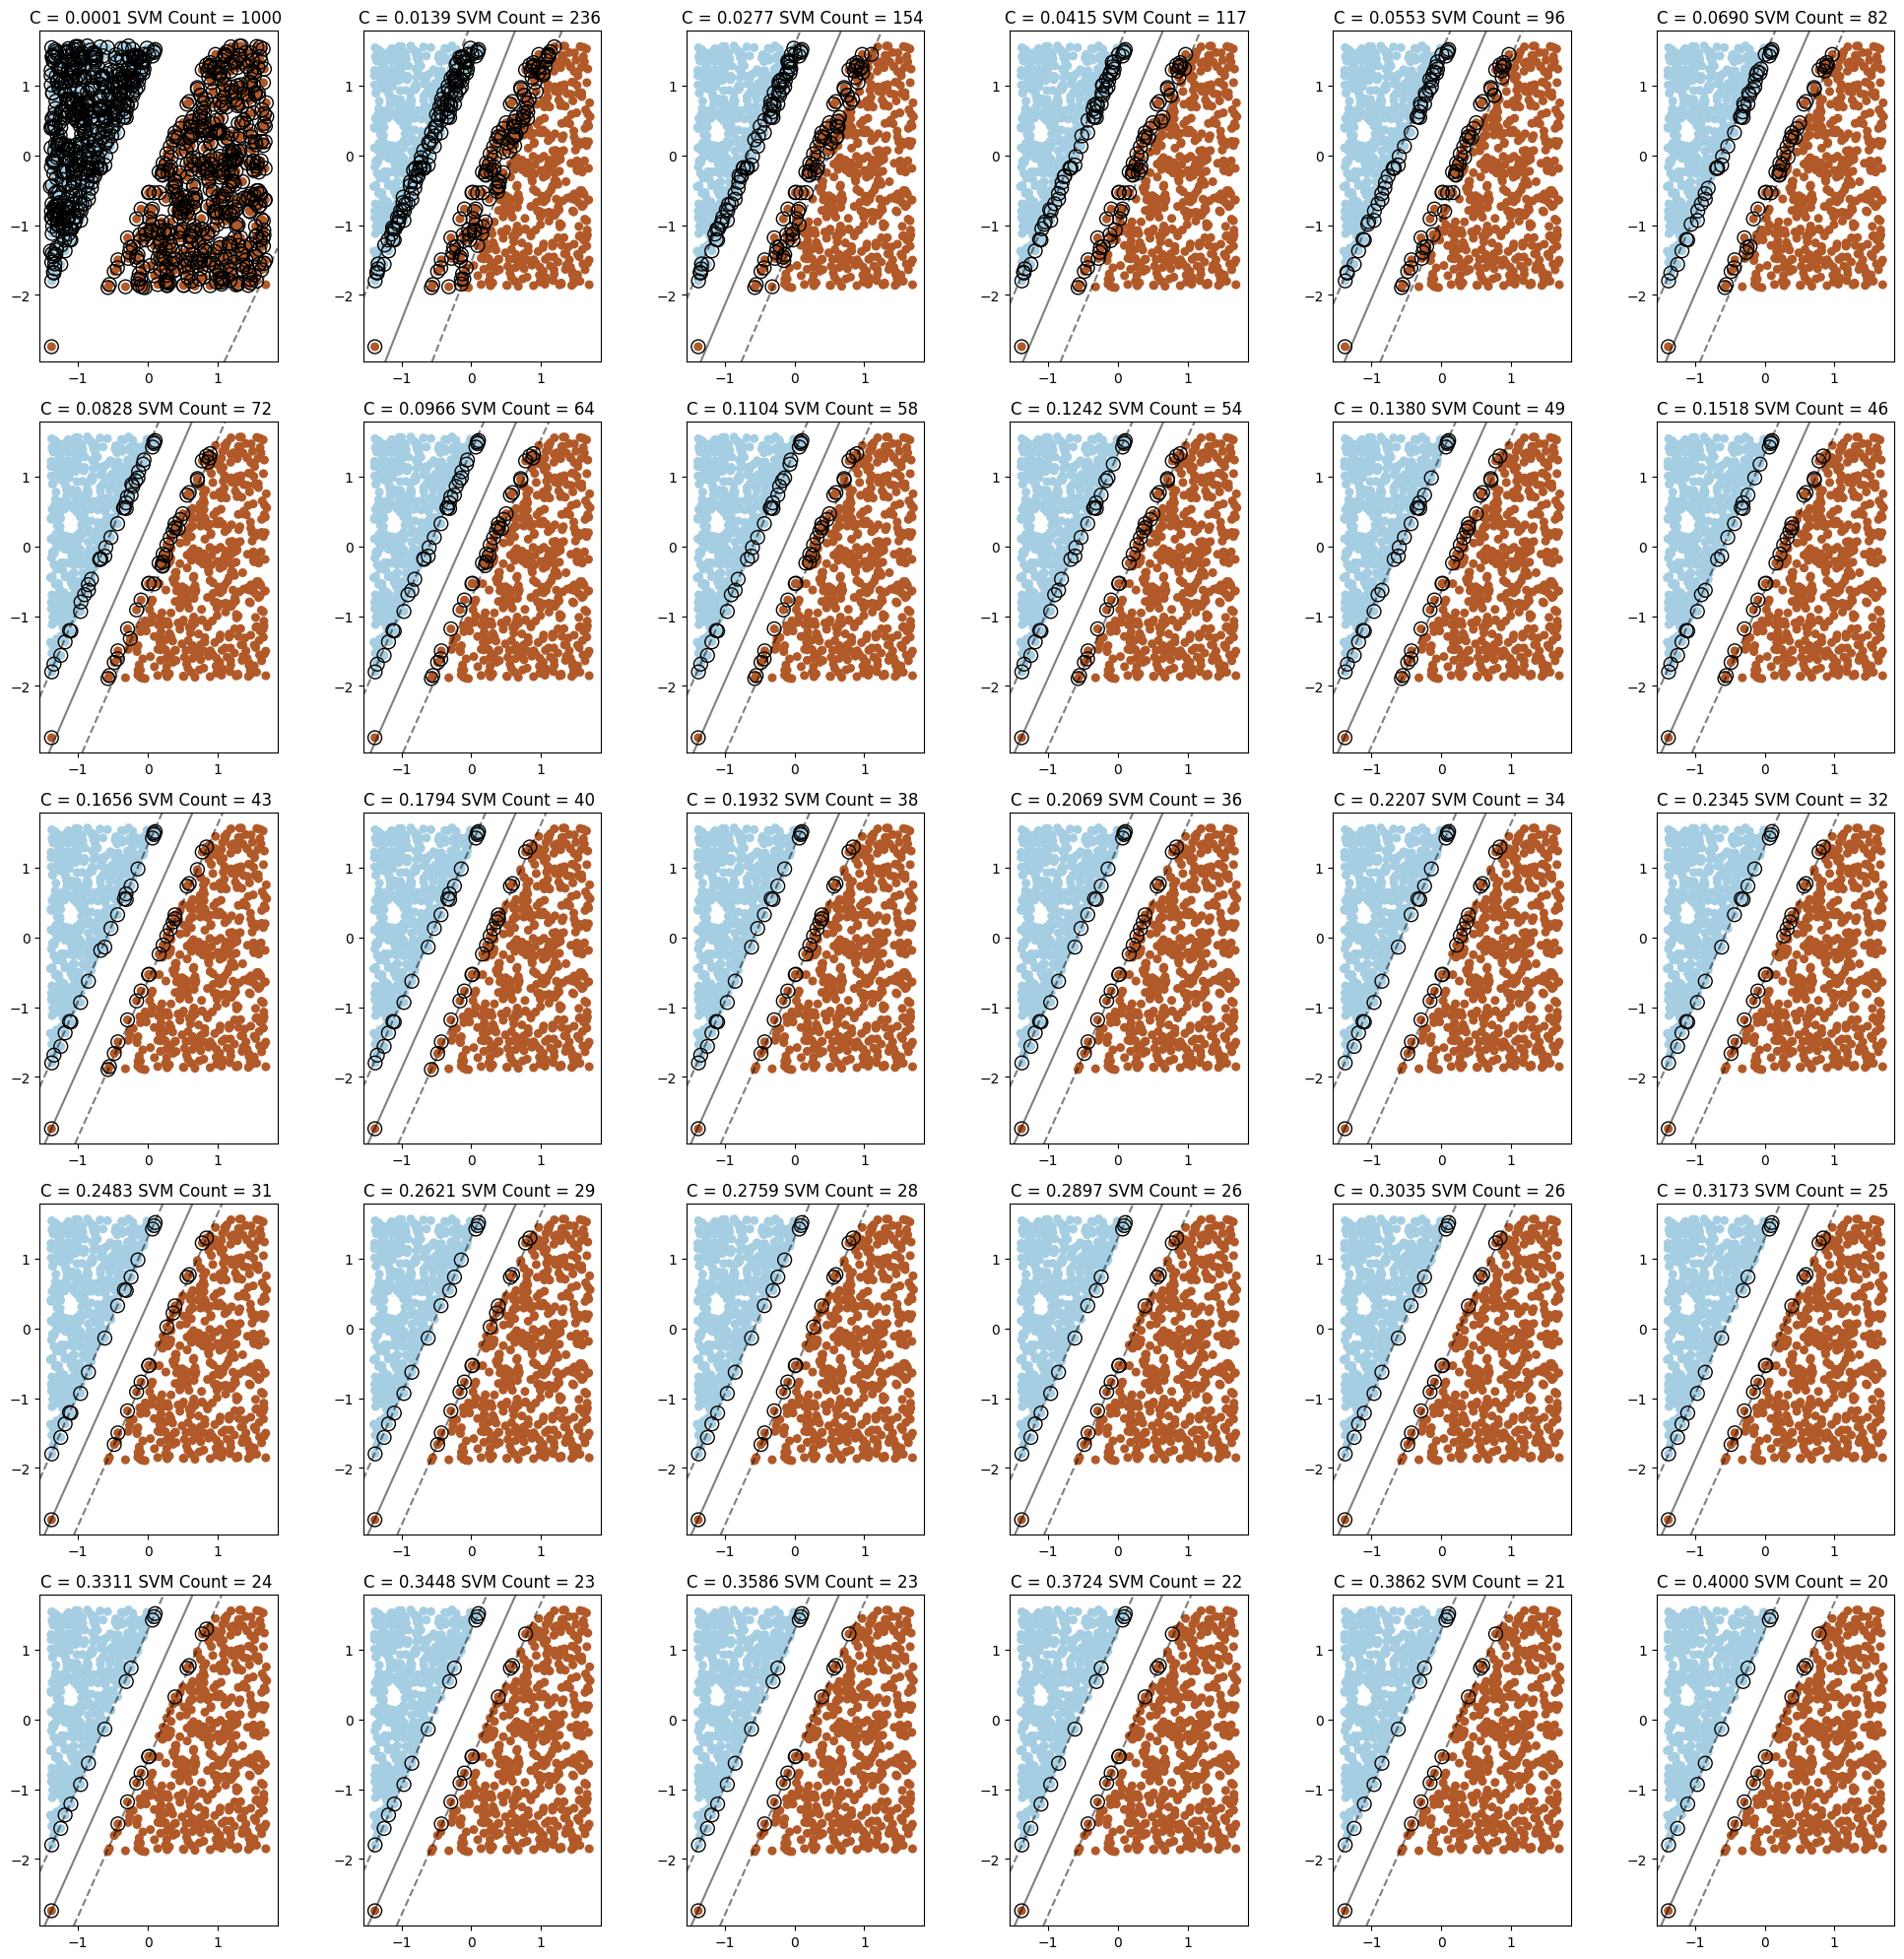

In [13]:
plt.figure(figsize=(20, 20))
C_values = np.linspace(0.0001, 0.4, 30)

for i, C_val in enumerate(C_values):
    current_model = svm.SVC(C=C_val, kernel="linear")
    current_model.fit(X, y)
    num_svm = len(current_model.support_vectors_)


    plt.subplot(5, 6, i + 1)
    plot_margin(X, y, current_model)
    plt.title(f"C = {C_val:.4f} SVM Count = {num_svm} ")



plt.tight_layout()
plt.show()

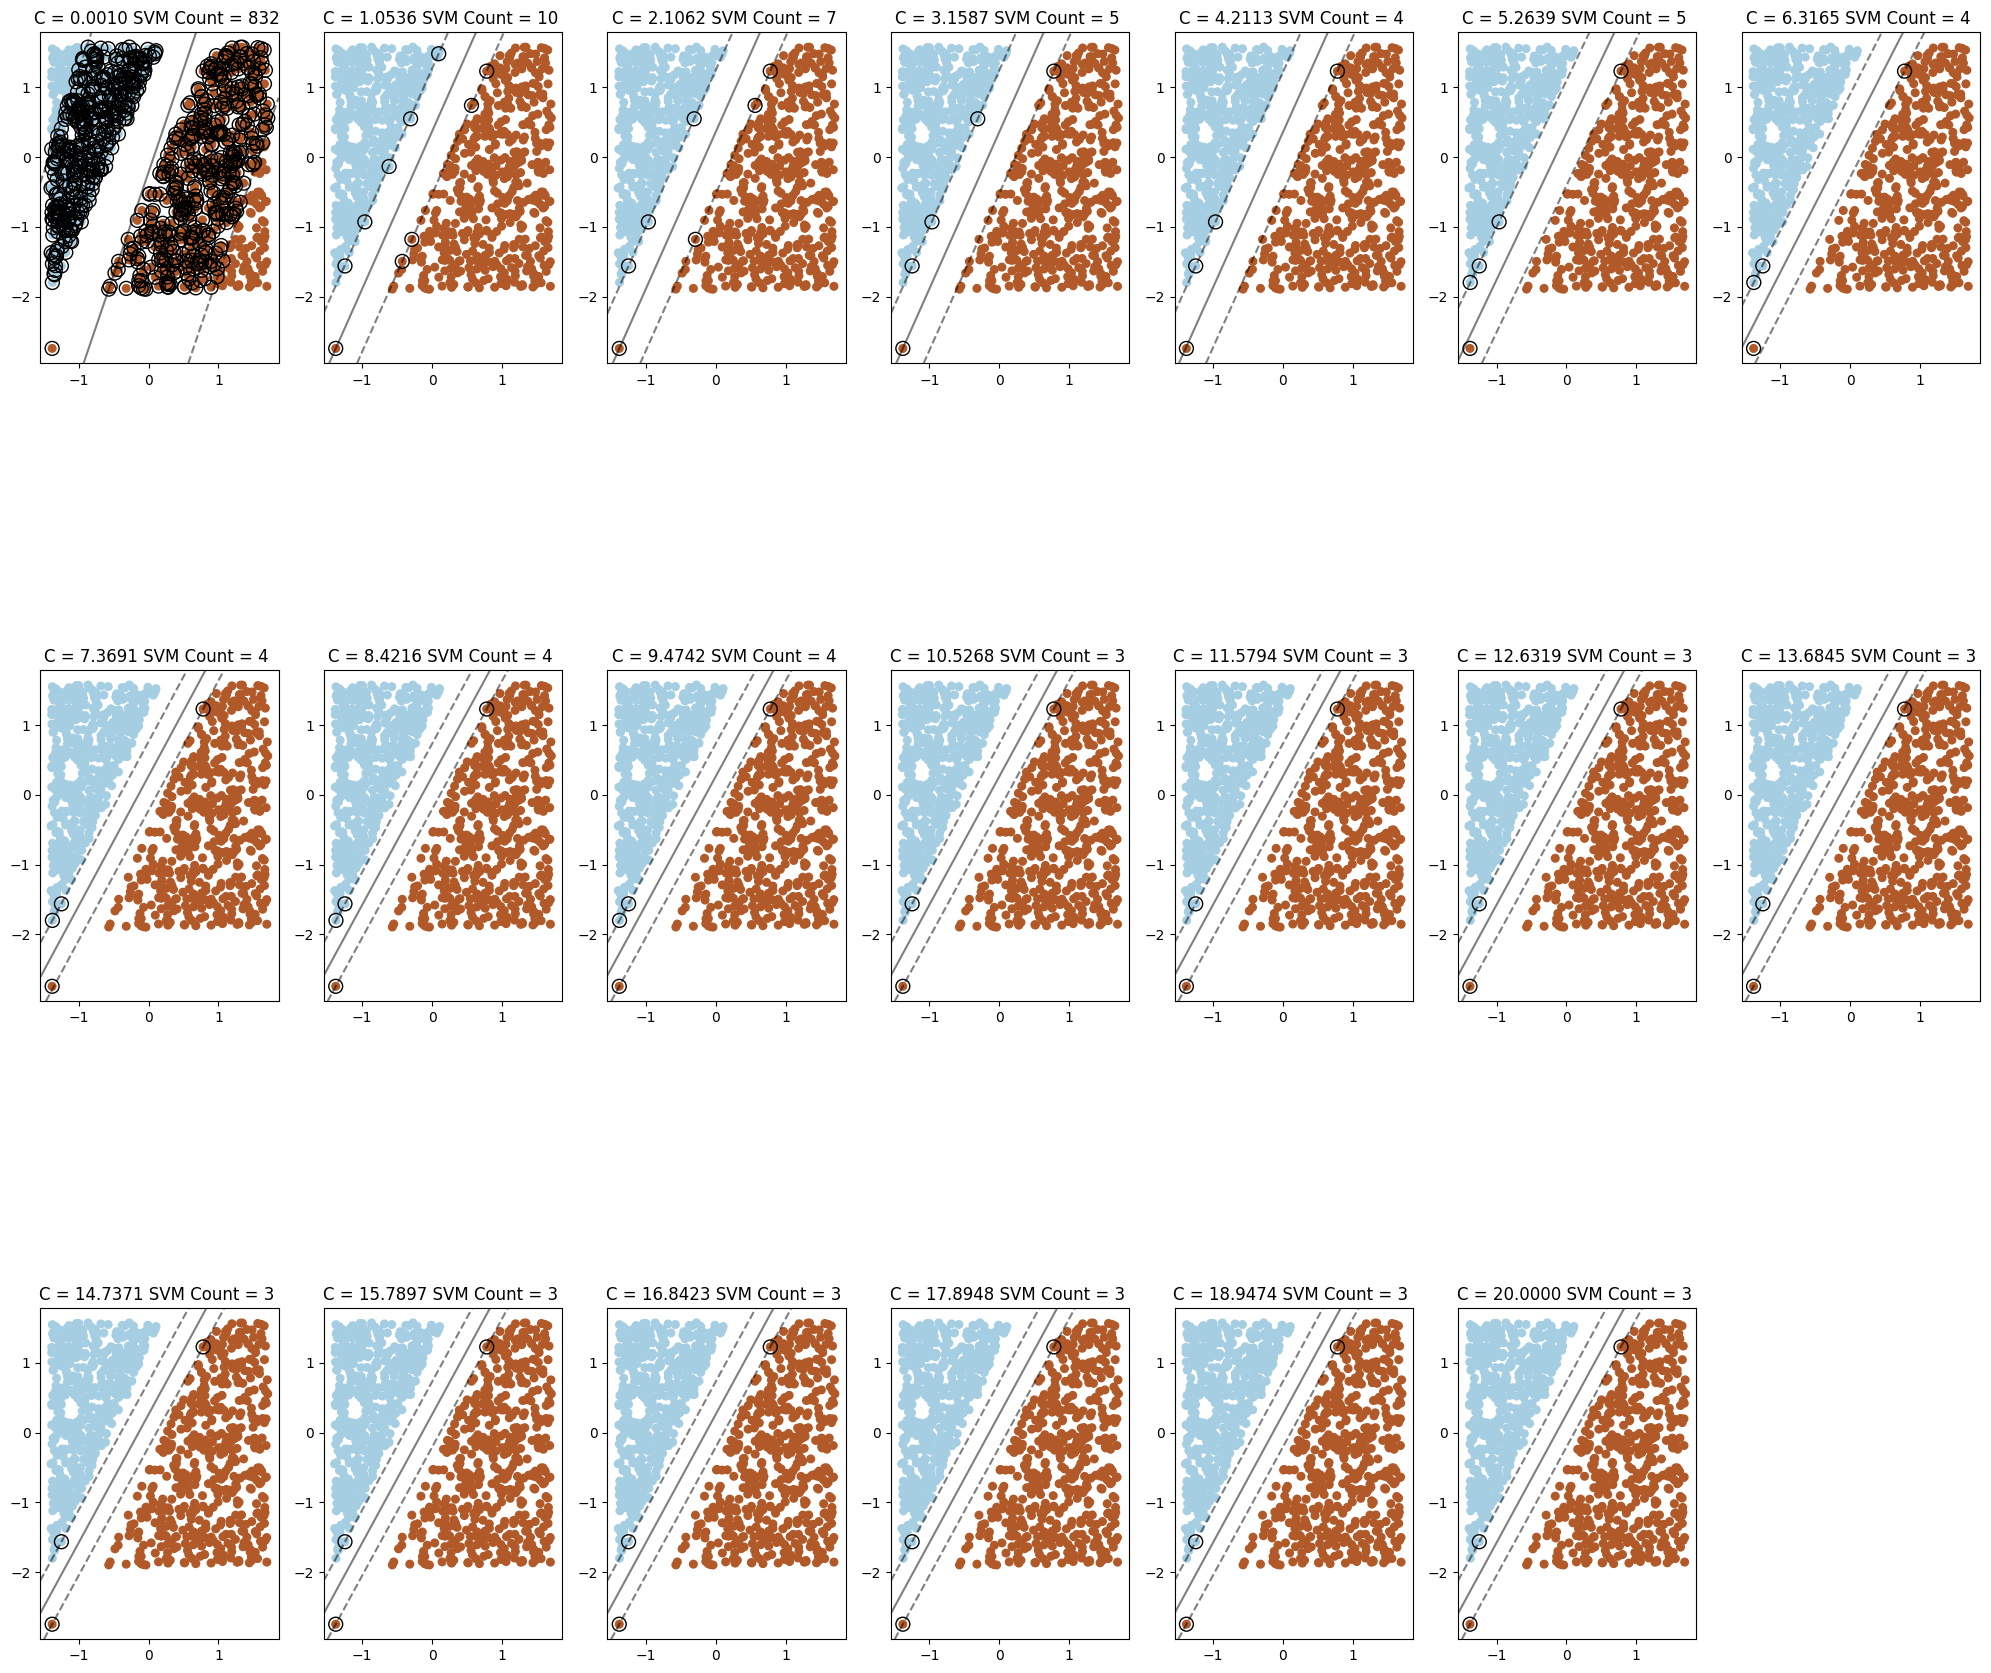

In [14]:
plt.figure(figsize=(20, 20))
C_values = np.linspace(0.001, 20 , 20)

for i, C_val in enumerate(C_values):
    current_model = svm.SVC(C=C_val, kernel="linear")
    current_model.fit(X, y)
    num_svm = len(current_model.support_vectors_)


    plt.subplot(3, 7, i + 1)
    plot_margin(X, y, current_model)
    plt.title(f"C = {C_val:.4f} SVM Count = {num_svm} ")

plt.tight_layout()
plt.show()

# Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM.

<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


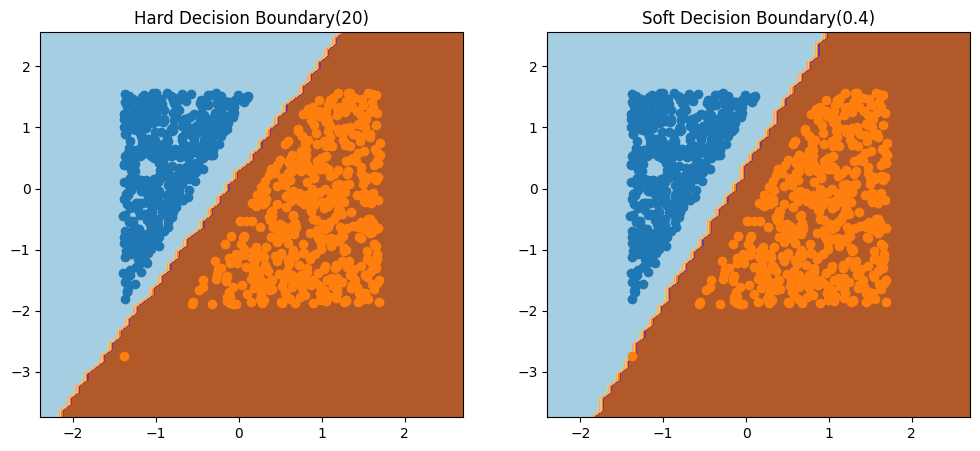

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Hard Decision Boundary(20)')
plot_decisions(X, y, clf_hard)

plt.subplot(1, 2, 2)
plt.title('Soft Decision Boundary(0.4)')
plot_decisions(X, y, clf_soft)



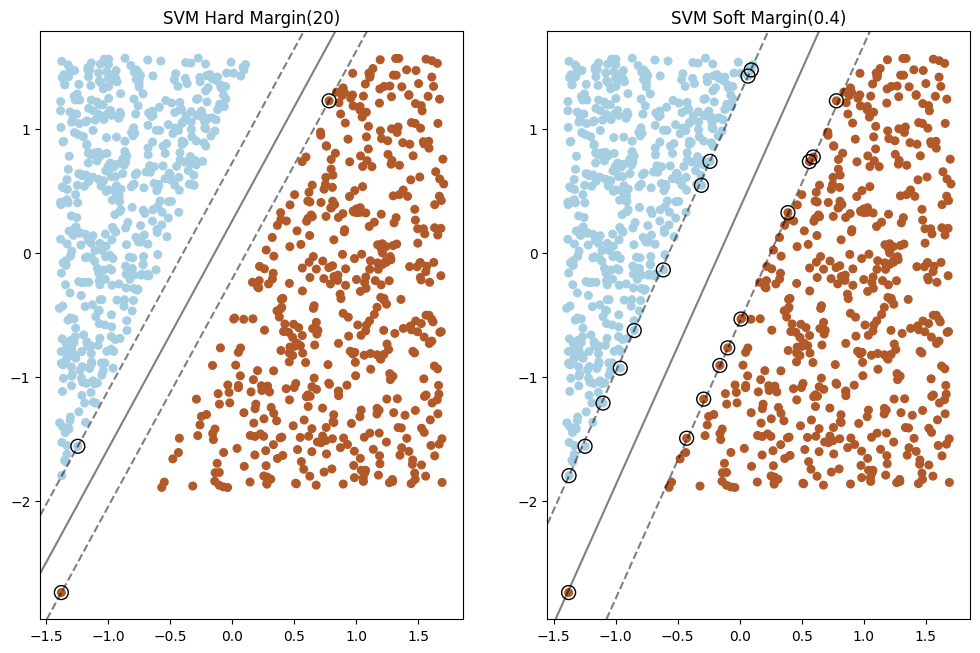

In [16]:
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.title('SVM Hard Margin(20)')
plot_margin(X, y, clf_hard)

plt.subplot(1, 2, 2)
plt.title('SVM Soft Margin(0.4)')
plot_margin(X, y,clf_soft)

# Numerical Data Explanation :-
In the above plots, I set a value of 0.4 for the soft margin and 20 for the hard margins to show how different they are. In the plots, you can clearly see these differences. The second plot, for the soft margin, lets some points get very close to or even cross the edge. But the chart on the right, for the hard margin, is stricter. It only lets a few mistakes happen, just three times. This shows how changing the value can make the edge between groups either more flexible or more strict.


In my graph svm count was more in soft margin than hard margin, which means it allows better generalization on unseen data.


## Reflection discussing the effect of C on the margin and the beneficial effect on generalisation:-


In the task of exploring Support Vector Machines (SVMs) for Task 1, I specifically manipulated the regularization parameter, C, to observe its impact on the model's decision boundaries between soft and hard margins. By opting for a lower C value for soft margins, the SVM model demonstrated a leniency towards misclassifications, allowing some data points to be on the wrong side of the margin. This approach inherently made the model less sensitive to minor fluctuations in the data, thereby enhancing its ability to generalize to new, unseen data by focusing on broader data patterns rather than overfitting to the training dataset.

Conversely, increasing C to enforce hard margins pushed the model towards a no-tolerance policy against misclassifications, striving to classify every training data point correctly. While this initially seemed like a rigorous strategy for accuracy, it accidently heightened the risk of overfitting. The model became too tailored to the outliers of the training data, compromising its performance on new data. Through this exercise, it became evident that the choice of
C is a delicate balance between achieving broad pattern recognition and avoiding the pitfalls of overfitting or underfitting, illustrating the significance of finding an optimal model that is robust enough to generalize well while being specific enough to be accurate.

# Task 2

# 2.1:-

# A. SVM (Dataset 2)

In [17]:
data_train2 = np.loadtxt('dataset_2_train.csv', delimiter=',')
data_test2 = np.loadtxt('dataset_2_test.csv', delimiter=',')
X_train2 = data_train2[:, 0:2]
y_train2 = data_train2[:, 2]
X_test2 = data_test2[:, 0:2]
y_test2 = data_test2[:, 2]

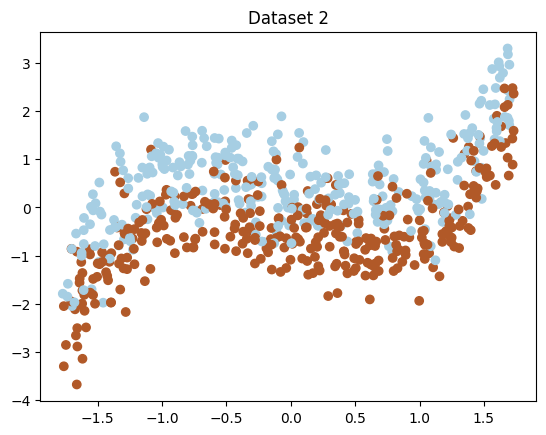

In [18]:
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, cmap='Paired')
plt.title("Dataset 2")
plt.show()

Here by looking at the above plot we can we the two data are not lineraly separable and thats the reason the kernel will not be able to classify the data properly, also there is a overlap of the data points hence it will be necessary to avoid overfitting.

# Approch to Kernel and Hyper-parameter Selection
 To determine the optimal hyperparameters for the Support Vector Machine (SVM), a methodical strategy will be employed. This involves utilizing Bayesian optimization to identify the most effective kernel and regularization parameter (C). The optimization process will incorporate 5-fold cross-validation to verify that the model exhibits robust performance on new, unseen data.

In [19]:
np.int =int

In [20]:
svm_param_optimization = BayesSearchCV(
    estimator=SVC(),
    search_spaces={
        'C': Real(1e-3, 1e2, 'log-uniform'),
        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    },
    cv=5,
    n_jobs=-1,
)

svm_param_optimization.fit(X_train2, y_train2)


print("Optimal Hyperparameters Found:")
for param, value in svm_param_optimization.best_params_.items():
    print(f"{param}: {value}")

Optimal Hyperparameters Found:
C: 1.0416607012137993
kernel: rbf


In [21]:
optimized_svm_model= svm.SVC(kernel=svm_param_optimization.best_params_['kernel'], C=svm_param_optimization.best_params_['C'])
optimized_svm_model.fit(X_train2, y_train2)

SVC(C=1.0416607012137993)

# Decision hyperplane:-

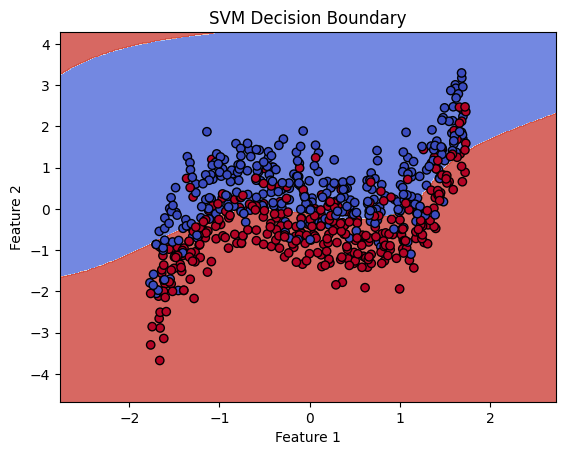

In [22]:
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = optimized_svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)


plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2.ravel(), edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Boundary")
plt.show()


In [30]:
accuracy_score = optimized_svm_model.score(X_test2, y_test2)
Ein = 1 - optimized_svm_model.score(X_train2, y_train2)
Eout = 1 - optimized_svm_model.score(X_test2, y_test2)
print(Ein)
print(Eout)
print(accuracy_score)

0.22686567164179106
0.2537764350453172
0.7462235649546828


<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


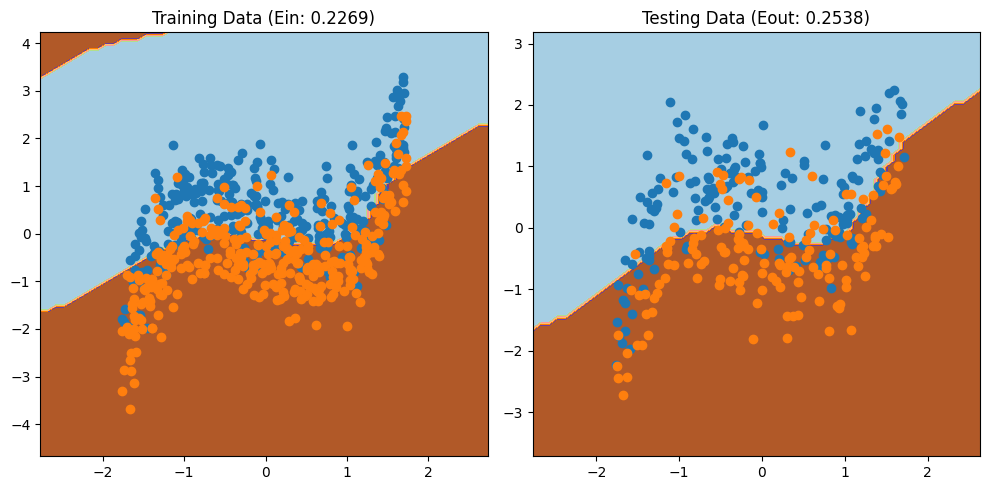

In [24]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(f"Training Data (Ein: {Ein:.4f})")
plot_decisions(X_train2, y_train2, optimized_svm_model)

plt.subplot(1, 2, 2)
plt.title(f"Testing Data (Eout: {Eout:.4f})")
plot_decisions(X_test2, y_test2, optimized_svm_model)

plt.tight_layout()
plt.show()


# B. SVM (Dataset 3)

In [25]:
data_train3 = np.loadtxt('dataset_3_train.csv', delimiter=',')
data_test3 = np.loadtxt('dataset_3_test.csv', delimiter=',')
X_train3 = data_train3[:, 0:2]
y_train3 = data_train3[:, 2]
X_test3 = data_test3[:, 0:2]
y_test3 = data_test3[:, 2]

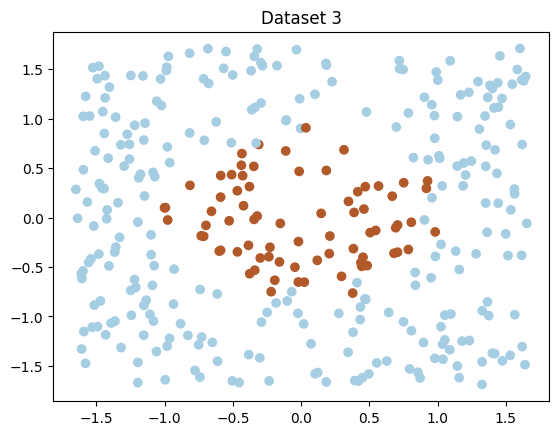

In [26]:
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_train3, cmap='Paired')
plt.title("Dataset 3")
plt.show()

In [31]:
svm_param_optimization1 = BayesSearchCV(
    estimator=SVC(),
    search_spaces={
        'C': Real(1e-3, 1e2, 'log-uniform'),
        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    },
    cv=5,
    n_jobs=-1,
)

svm_param_optimization.fit(X_train3, y_train3)


print("Optimal Hyperparameters Found:")
for param, value in svm_param_optimization.best_params_.items():
    print(f"{param}: {value}")

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Optimal Hyperparameters Found:
C: 14.98698934071426
kernel: rbf


In [32]:
optimized_svm_model2= svm.SVC(kernel=svm_param_optimization.best_params_['kernel'], C=svm_param_optimization.best_params_['C'])
optimized_svm_model2.fit(X_train3, y_train3)

SVC(C=14.98698934071426)

# Decision hyperplane:-

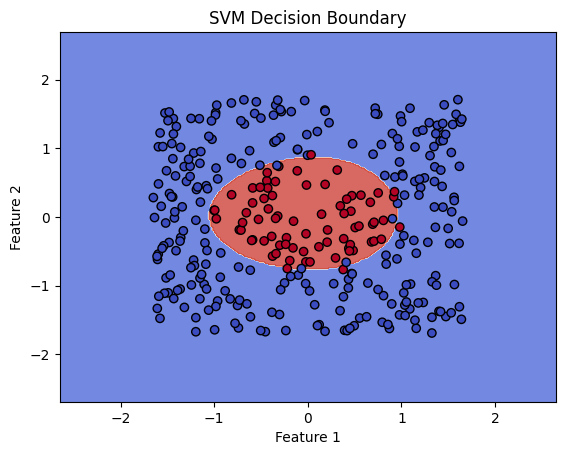

In [33]:
x_min, x_max = X_train3[:, 0].min() - 1, X_train3[:, 0].max() + 1
y_min, y_max = X_train3[:, 1].min() - 1, X_train3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = optimized_svm_model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)


plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_train3.ravel(), edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Boundary")
plt.show()


In [56]:
accuracy_score2 = optimized_svm_model2.score(X_test3, y_test3)
Ein1 = 1 - optimized_svm_model2.score(X_train3, y_train3)
Eout1 = 1 - optimized_svm_model2.score(X_test3, y_test3)
print(Ein1)
print(Eout1)
print(accuracy_score2)

0.02985074626865669
0.024242424242424288
0.9757575757575757


<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


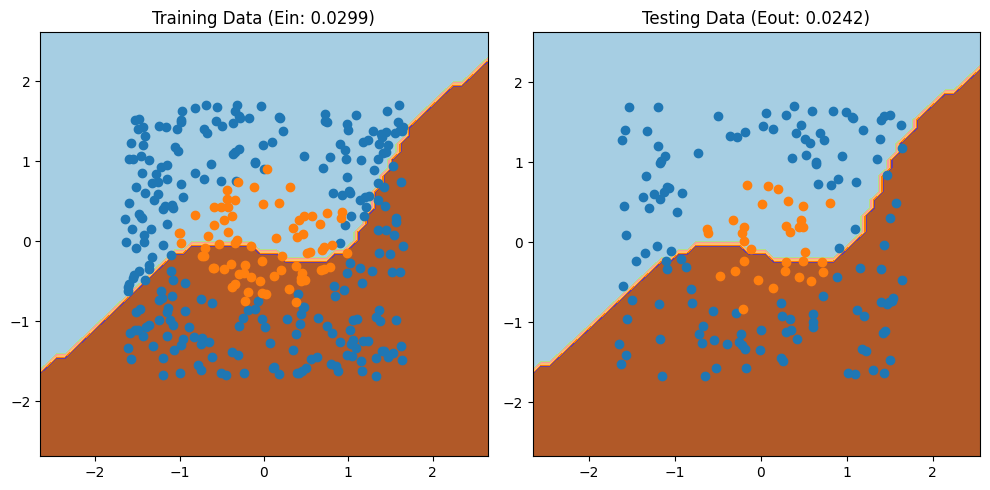

In [35]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(f"Training Data (Ein: {Ein1:.4f})")
plot_decisions(X_train3, y_train3, optimized_svm_model)

plt.subplot(1, 2, 2)
plt.title(f"Testing Data (Eout: {Eout1:.4f})")
plot_decisions(X_test3, y_test3, optimized_svm_model)

plt.tight_layout()
plt.show()

# Neural Network :- Dataset 2

In [36]:
# Define the search space
param_space_nn = {
    'layer1': Integer(1, 50),
    'layer2': Integer(1, 50),
    'layer3': Integer(1, 50),
    'activation': Categorical(['relu', 'logistic', 'tanh', 'identity']),
}


# Initialize the optimizer
NN1 = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces=param_space_nn,
    cv = 10,
    n_jobs = 8
)

In [37]:
NN1.fit(X_train2, y_train2)

# Evaluate the model
score = NN1.score(X_test2, y_test2)
print("Score = ", score)
print(NN1.best_params_)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Score =  0.7673716012084593
OrderedDict([('activation', 'relu'), ('layer1', 33), ('layer2', 50), ('layer3', 50)])


In [57]:
Ein2 = 1 - NN1.score(X_train2, y_train2)
Eout2 = 1 - NN1.score(X_test2, y_test2)
print(Ein2)
print(Eout)

0.22238805970149256
0.2537764350453172


<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


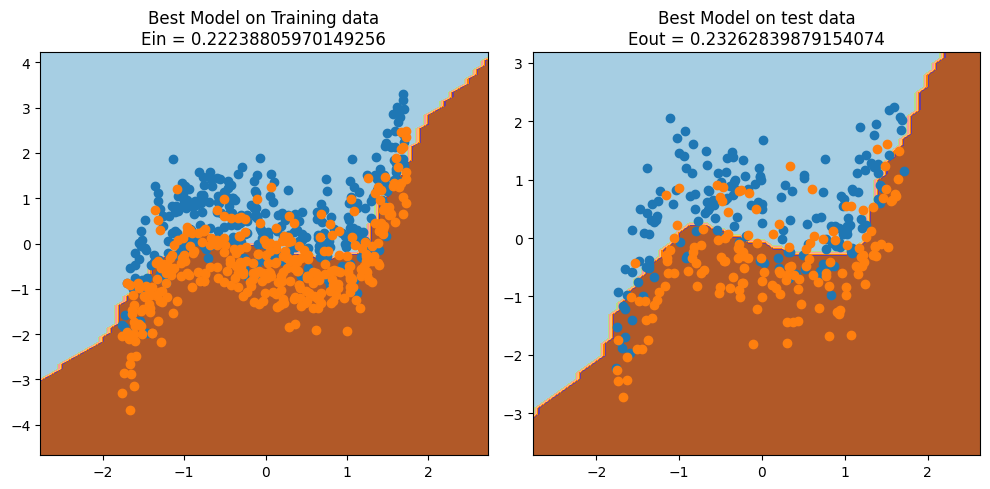

In [39]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plot_decisions(X_train2, y_train2, NN1)
plt.title(f"Best Model on Training data\nEin = {Ein2}")

plt.subplot(1, 2, 2)

plot_decisions(X_test2, y_test2, NN1)
plt.title(f"Best Model on test data\nEout = {Eout2}")

plt.tight_layout()
plt.show()

# Neural Network : Dataset 3

In [40]:
# Define the search space
param_space_nn = {
    'layer1': Integer(1, 50),
    'layer2': Integer(1, 50),
    'layer3': Integer(1, 50),
    'layer4': Integer(1, 50),
    'activation': Categorical(['relu', 'logistic', 'tanh', 'identity']),
}


# Initialize the optimizer
NN2 = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces=param_space_nn,
    cv = 10,
    n_jobs = 8
)

In [53]:
NN2.fit(X_train3, y_train3)

# Evaluate the modelw
score = NN2.score(X_test3, y_test3)
print("Score = ", score)
print(NN2.best_params_)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Score =  0.9757575757575757
OrderedDict([('activation', 'relu'), ('layer1', 39), ('layer2', 46), ('layer3', 41), ('layer4', 20)])


In [58]:
Ein3 = 1 - NN2.score(X_train3, y_train3)
Eout3 = 1 - NN2.score(X_test3, y_test3)
print(Ein3)
print(Eout3)

0.017910447761193993
0.024242424242424288


<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
<ipython-input-5-4a88a4dcbac0>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


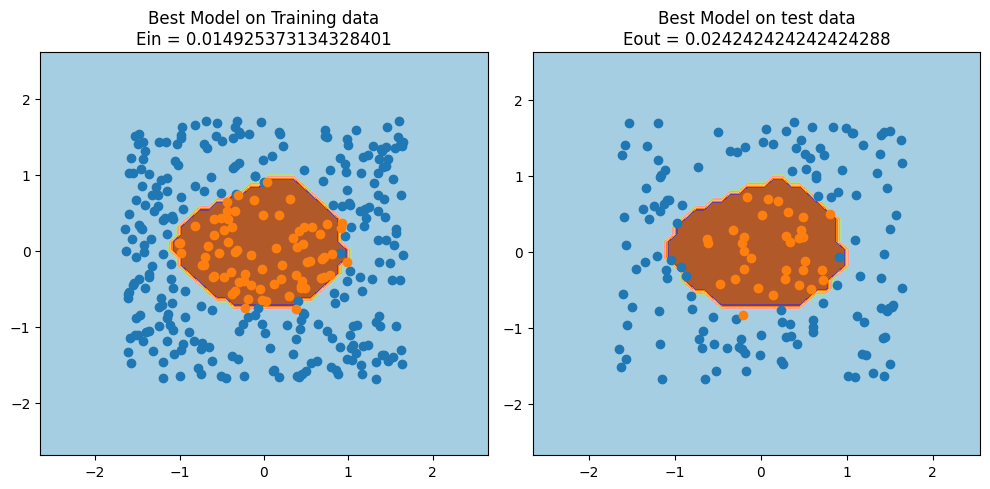

In [43]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plot_decisions(X_train3, y_train3, NN2)
plt.title(f"Best Model on Training data\nEin = {Ein3}")

plt.subplot(1, 2, 2)

plot_decisions(X_test3, y_test3, NN2)
plt.title(f"Best Model on test data\nEout = {Eout3}")

plt.tight_layout()
plt.show()

## Reflection



| Dataset | Model | Best Parameters Discovered | Ein | Eout | Accuracy|
|---------|-------|----------------------------|-----|------|---------|
| 2       | SVM   | {C: 1.0416607012137993      kernel: rbf} | 0.22 | 0.25|0.74|
| 3       | SVM   | {C: 14.98698934071426 kernel: rbf} | 0.029|0.024|0.975 |
| 2       | NN    | ([('activation', 'relu'), ('layer1', 33), ('layer2', 50), ('layer3', 50)]) | 0.22 |0.25 |0.76 |
| 3       | NN    | ([('activation', 'relu'), ('layer1', 39), ('layer2', 46), ('layer3', 41), ('layer4', 20)]) | 0.017| 0.024| 0.975|



Reflections on Dataset 2:

SVM:
- Kernel: I used a method called "RBF."
- Best C Value: I found that the best value for a parameter called "C" was around 1.04. And achieved an accuracy of 74%.
- Errors: Error for the data Ein) was about 22.39%, and for new data (Eout), it was about 25.08%.

For Dataset 2, I used a method called Support Vector Machine (SVM) with an RBF kernel. It did okay, but not great. When I looked at data I already knew, I got about 22.39% wrong, and for new data, it was about 25.08% wrong. The best value I found for a parameter called "C" was around 1.04.

Neural Network:
- Layers: I used three layers with sizes 33, 50, and 50.
- Activation Function: I used "ReLU."
- Score: My overall score was around 76%.

I also tried using a neural network with three layers and ReLU activation function. My overall score was around 76%, which means I did okay but not great.

Reflections on Dataset 3:

SVM:
- Kernel: I used RBF again.
- Best C Value: This time, the best value for "C" was around 14.98.
- Errors: For training and test data, my errors were really low – about 0.029 and 0.024, respectively.

Dataset 3 worked much better for me! My Support Vector Machine with RBF kernel had really low errors – only about 2.99% for train data and 2.48% for test data. The best "C" value I found was around 14.98.

Neural Network:
- Layers: I tried four layers with sizes 39, 46, 46, and 41.
- Activation Function: Again, I used ReLU.
- Score: This time, my overall score was super high – around 97.58%.

I also tried a neural network with four layers and ReLU activation. And it worked well! My overall score was around 97.58%, which means I got most things right.

General Observations:

I found Dataset 3 to be better suited for modeling than Dataset 2. With both Support Vector Machine (SVM) and neural network models, Dataset 3 consistently showed lower errors and higher accuracy.

For SVM models, Dataset 3 had significantly lower error rates compared to Dataset 2.

Similarly, neural network models performed exceptionally well on Dataset 3, achieving around 97% approx accuracy. This was due to a more complex architecture capturing subtle patterns in the data.

These findings highlight the importance of choosing the right model settings. Dataset characteristics strongly influence model performance.

Exploring alternative techniques could further improve predictions across different datasets, benefiting real-world applications.